In [26]:
# import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [27]:
# to import the dataset using pandas
wildfire = pd.read_csv("C:/Users/HP/Downloads/DATA ANALYSIS/Historical_Wildfires.csv")

In [28]:
# To view the first five rows of the dataset
wildfire.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [29]:
# To view all the columns in the dataset
wildfire.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [30]:
# To determine data types
wildfire.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [31]:
# Notice the type of 'Date' is object, so we have to convert it to 'datetime' type, extract 'Year' and 'Month' from date, and include them in the dataframe as separate columns
import datetime as dt
wildfire['Year'] = pd.to_datetime(wildfire['Date']).dt.year
wildfire['Month'] = pd.to_datetime(wildfire['Date']).dt.month

In [32]:
# To verify the columns
wildfire.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [33]:
# Data Cleaning
wildfire.info()
wildfire.shape

print("The data shape is:", wildfire.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
 10  Year                                 26406 non-null  int32  
 11  Month                       

In [34]:
wildfire.describe()

,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Year,Month
count,26406.000000,26406.000000,26406.000000,26406.000000,24199.000000,24199.000000,26406.000000,26406.000000,26406.000000
mean,144.297966,319.662078,83.621258,87.574735,7.228302,56.229092,72.059305,2012.473264,6.454404
std,314.453847,8.862005,67.510022,4.371972,1.995221,25.898935,150.973128,4.592052,3.397609
min,1.000000,290.700000,0.000000,76.000000,0.000000,0.000000,1.000000,2005.000000,1.000000
25%,8.911875,313.933333,44.150391,85.000000,6.687010,44.716106,5.000000,2008.000000,4.000000
50%,38.434091,319.784412,67.133333,87.771429,7.707025,59.398234,20.000000,2013.000000,6.000000
75%,146.951278,325.403144,103.123611,90.498403,8.236665,67.842642,74.000000,2017.000000,9.000000
max,10120.943170,381.950000,2178.600000,100.000000,16.970563,288.000000,3954.000000,2020.000000,12.000000


In [35]:
wildfire.isnull().sum()

Region                                    0
Date                                      0
Estimated_fire_area                       0
Mean_estimated_fire_brightness            0
Mean_estimated_fire_radiative_power       0
Mean_confidence                           0
Std_confidence                         2207
Var_confidence                         2207
Count                                     0
Replaced                                  0
Year                                      0
Month                                     0
dtype: int64

In [36]:
# to see how the rows with missing data in columns "Std_confidence" & "Std_confidence" appear.
wildfire[wildfire.isnull().any(axis=1)]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month
48,NSW,2/26/2005,1.00,303.15,8.0,79.0,NaN,NaN,1,R,2005,2
149,NSW,6/12/2005,1.00,302.55,17.9,79.0,NaN,NaN,1,R,2005,6
154,NSW,6/18/2005,5.27,301.30,71.9,77.0,NaN,NaN,1,R,2005,6
157,NSW,6/25/2005,9.60,300.70,145.9,76.0,NaN,NaN,1,R,2005,6
163,NSW,7/9/2005,2.80,294.65,37.8,79.0,NaN,NaN,1,R,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...
26327,WA,8/9/2020,2.34,300.15,30.2,85.0,NaN,NaN,1,N,2020,8
26331,WA,8/13/2020,1.10,320.35,27.1,83.0,NaN,NaN,1,N,2020,8
26332,WA,8/14/2020,1.00,302.15,15.8,77.0,NaN,NaN,1,N,2020,8
26335,WA,8/20/2020,1.92,326.85,86.2,92.0,NaN,NaN,1,N,2020,8


In [37]:
# to check for duplicates
wildfire[wildfire.duplicated()]

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced,Year,Month


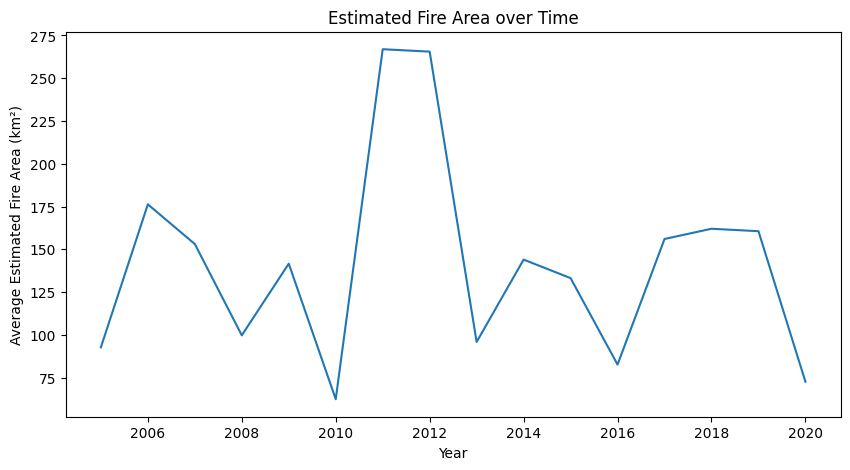

In [38]:
# to understand the change in average estimated fire area over time (use pandas to plot)
# first off, you create the empty figure
plt.figure(figsize=(10, 5))

# This groups the data on estimated fire area by the values in the 'Year' column. So you end up with one average fire area per year.
wildfire_new=wildfire.groupby('Year')['Estimated_fire_area'].mean()

# plot the graph
wildfire_new.plot(x=wildfire_new.index, y=wildfire_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

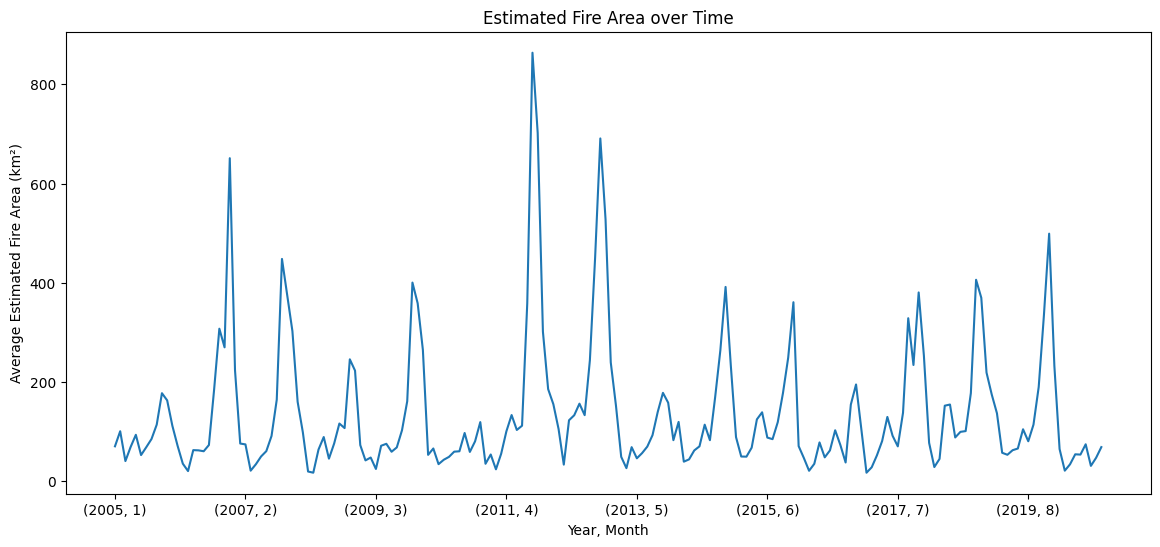

In [39]:
# narrow down our finding, by plotting the estimated fire area for year grouped together with month.
plt.figure(figsize=(14,6))
# Similar to the plot above, we want to group together with month
wildfire_new=wildfire.groupby(['Year','Month'])['Estimated_fire_area'].mean()
wildfire_new.plot(x=wildfire_new.index, y=wildfire_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

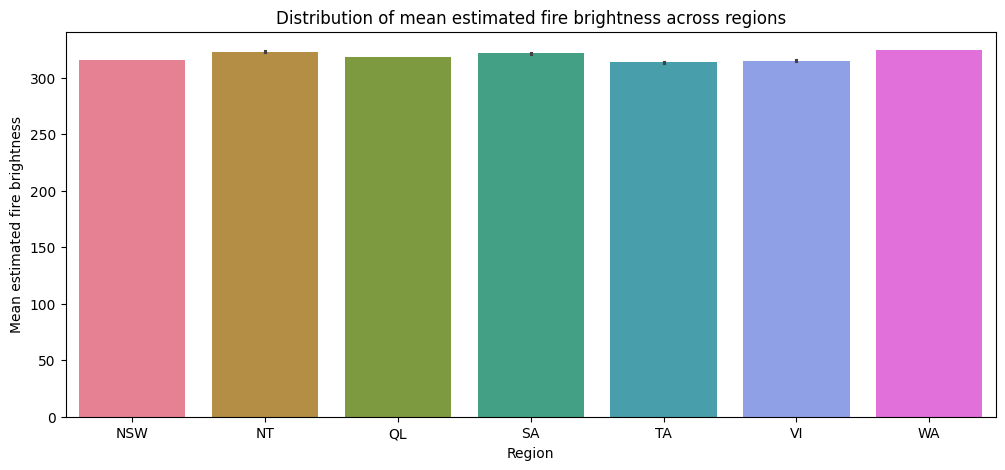

In [40]:
#  to have an insight on the distribution of mean estimated fire brightness across the regions use the functionality of seaborn to develop a barplot
wildfire['Region'].unique()

plt.figure(figsize=(12,5))
sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=wildfire, hue='Region', palette = 'husl')
plt.xlabel('Region')
plt.ylabel('Mean estimated fire brightness')
plt.title('Distribution of mean estimated fire brightness across regions')

plt.show()

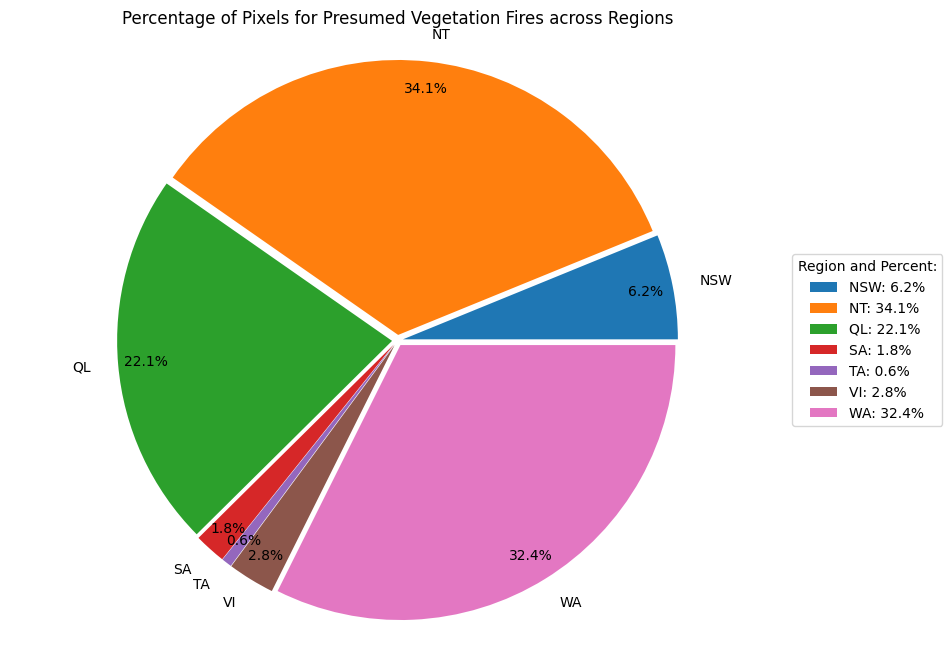

In [41]:
# find the portion of count of pixels for presumed vegetation fires vary across regions we will develop a pie chart for this
wildfire_grouped_reg = wildfire.groupby('Region')['Count'].sum()

# To create new dataframe
wildfire_reg = pd.DataFrame(wildfire_grouped_reg).reset_index()
wildfire_reg.sort_values(by='Count', ascending=False)

# to plot the pie chart
plt.figure(figsize=(10, 8))
explode_values = [0.02] * len(wildfire_reg['Count'])
plt.pie(wildfire_reg['Count'], labels=wildfire_reg['Region'], autopct='%1.1f%%', pctdistance=0.9, explode=explode_values)
plt.title('Percentage of Pixels for Presumed Vegetation Fires across Regions')
plt.axis('equal')

# to show the percentage values
percent_values = ['{:.1f}%'.format(value) for value in (wildfire_reg['Count']/wildfire_reg['Count'].sum()*100)]

# legend labels
legend_labels = [f'{region}: {percent}' for region, percent in zip(wildfire_reg['Region'], percent_values)]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Region and Percent:")

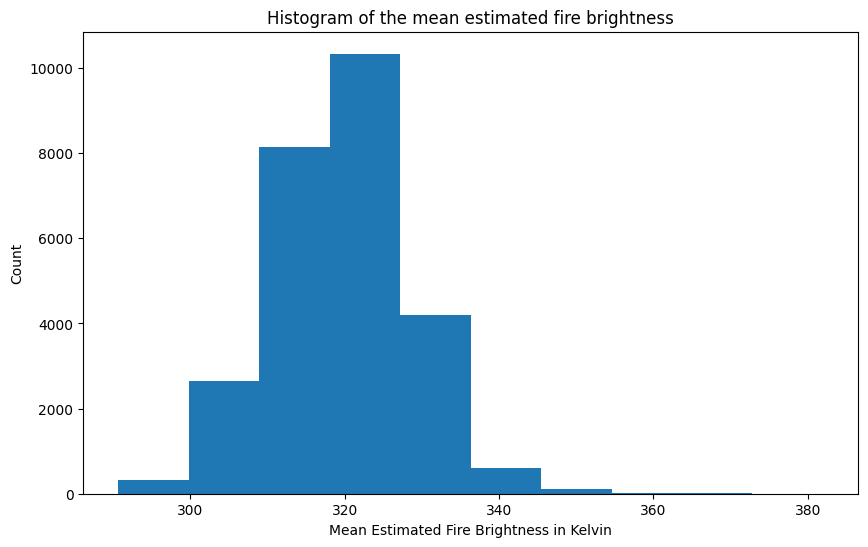

In [42]:
#  to develop a histogram of the mean estimated fire brightness - Using Matplotlib to create the histogram
plt.figure(figsize=(10,6))

# Using Matplotlib
plt.hist(wildfire['Mean_estimated_fire_brightness'])
plt.title("Histogram of the mean estimated fire brightness")
plt.xlabel('Mean Estimated Fire Brightness in Kelvin')
plt.ylabel('Count')

plt.show()

Text(0, 0.5, 'Count')

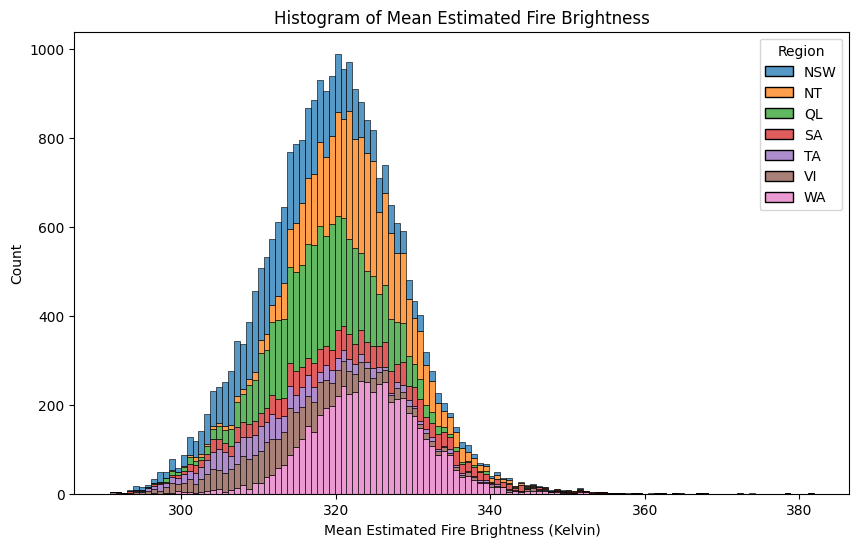

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(data=wildfire, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')

Text(0, 0.5, 'Density')

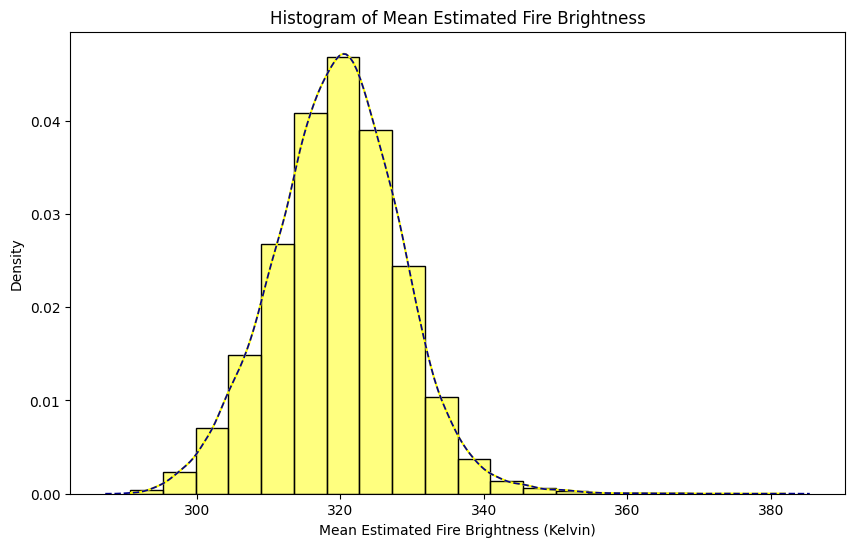

In [44]:
# To better understand the distribution of estimated fire brightness across regions? We'll use the functionality of seaborn and pass region as hue
plt.figure(figsize=(10,6))
sns.histplot(data=wildfire, x= 'Mean_estimated_fire_brightness', bins=20, color='yellow', edgecolor='black', kde=True, fill=True, stat='density')
sns.kdeplot(data=wildfire, x='Mean_estimated_fire_brightness', color='darkblue', linestyle= '--', linewidth=1.25)
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Density')

Text(0.5, 1.0, 'Histogram with Distribution Curves of Mean Estimated Fire Brightness')

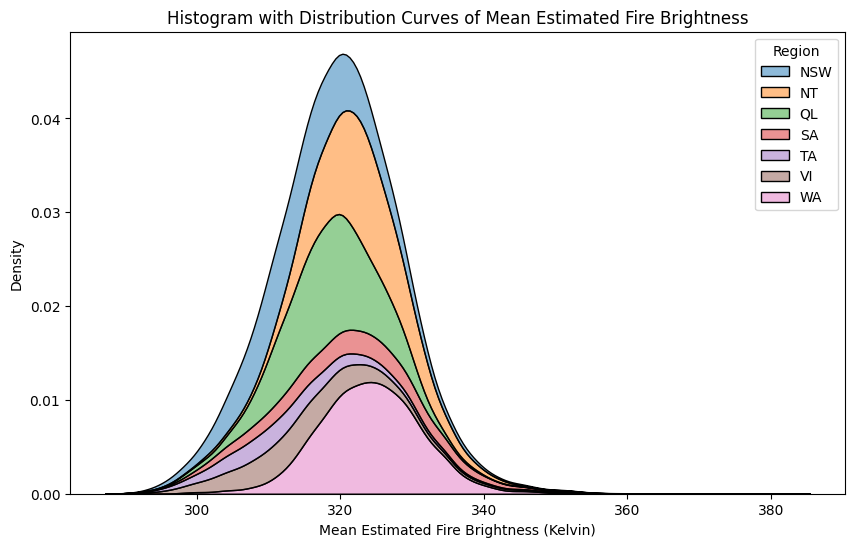

In [45]:
# to try something else for the distribution of estimated fire brightness across regions
plt.figure(figsize=(10,6))
sns.kdeplot(data=wildfire, x='Mean_estimated_fire_brightness', hue='Region', palette='tab10', fill=True, alpha=0.5, multiple='stack')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Density')
plt.title('Histogram with Distribution Curves of Mean Estimated Fire Brightness')

In [46]:
wildfire[['Mean_estimated_fire_radiative_power', 'Mean_confidence']].corr()

,Mean_estimated_fire_radiative_power,Mean_confidence
Mean_estimated_fire_radiative_power,1.000000,0.452322
Mean_confidence,0.452322,1.000000


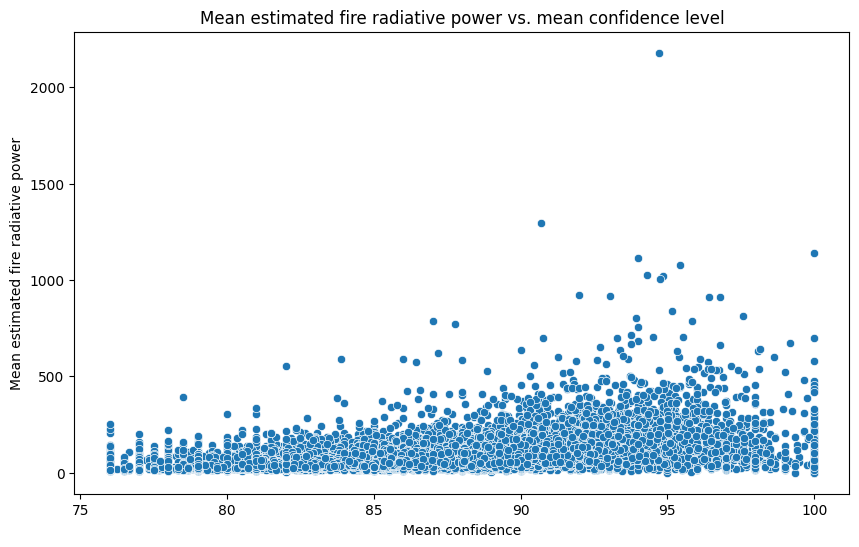

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=wildfire, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.title('Mean estimated fire radiative power vs. mean confidence level')
plt.xlabel('Mean confidence')
plt.ylabel('Mean estimated fire radiative power')

plt.show()

<Axes: xlabel='Mean_confidence', ylabel='Mean_estimated_fire_radiative_power'>

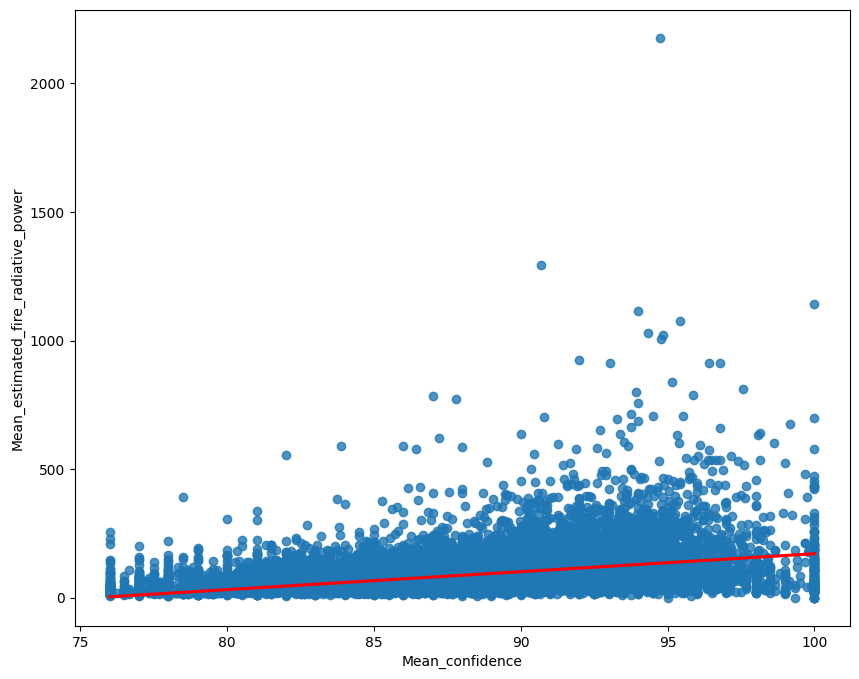

In [48]:
# to find if there is any correlation between mean estimated fire radiative power and mean confidence level?
plt.figure(figsize=(10,8))
sns.regplot(data= wildfire, x='Mean_confidence', y='Mean_estimated_fire_radiative_power', ci=99, line_kws=dict(color='r'))

In [49]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [53]:
australia= folium.Map(location=[-25, 135], zoom_start=4)

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(region_data['Lat'], region_data['Lon']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = region_data['Lat']
longitudes = region_data['Lon']
labels = region_data['region']

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(australia)

australia.add_child(incidents)